<a href="https://colab.research.google.com/github/zuozuo11/final/blob/main/final_project_Zuo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from category_encoders import OrdinalEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from collections import Counter
from sklearn import metrics

from imblearn.over_sampling import SMOTE
from google.colab import files
import io

from imblearn.under_sampling import RandomUnderSampler
from xgboost import plot_importance

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pip install category_encoders

     |████████████████████████████████| 86 kB 3.0 MB/s 


In [ ]:
uploaded = files.upload()

Saving Cleaned_Data.csv to Cleaned_Data.csv


In [ ]:
data = pd.read_csv('/content/Cleaned_Data.csv',encoding='latin1')

In [ ]:
display(data.head(5))
display(data.describe())
display(data.info())
display(data.isnull().sum())

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,Ozone,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6001407300,2420,Alameda,94601,Oakland,-122.210924,37.762179,65.03368513,97.84417549,0.029372,...,71.15983218,50.1,81.90954774,11,89.66684019,35.5,96.52724968,82.40183906,8.547748991,94.85627837
1,6001409000,4687,Alameda,94621,Oakland,-122.221368,37.720011,63.17258084,97.17599597,0.030640,...,73.36581405,44.7,75.7160804,7.3,69.9765747,23,74.04309252,81.64710362,8.469458395,94.16288452
2,6001408800,7149,Alameda,94621,Oakland,-122.196942,37.758804,61.00690204,96.24306606,0.030640,...,44.36324266,65.1,95,8.7,79.72410203,23.3,75.10773131,86.77370423,9.001253506,97.7433182
3,6001409100,2490,Alameda,94603,Oakland,-122.183500,37.732326,57.14347122,93.99899143,0.031908,...,50.62179516,43.8,74.45979899,6.2,59.38313378,34.2,95.52598226,84.57904492,8.773596004,96.2934947
4,6001406100,4733,Alameda,94601,Oakland,-122.227594,37.774155,56.86484247,93.8477055,0.029372,...,87.88740019,51.8,83.86934673,6.9,66.60593441,29.8,90.24081115,75.51276215,7.833127802,87.32980333


,Census Tract,Total Population,ZIP,Longitude,Latitude,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,...,Imp. Water Bodies Pctl,Solid Waste,Solid Waste Pctl,Pollution Burden,Pollution Burden Score,Pollution Burden Pctl,Asthma,Asthma Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl
count,8.035000e+03,8035.000000,8035.000000,8035.000000,8035.000000,8035.000000,8035.000000,8035.000000,8035.000000,8035.000000,...,8035.000000,8035.000000,8035.000000,8035.000000,8035.000000,8035.000000,8035.000000,8035.000000,8035.000000,8035.000000
mean,6.054896e+09,4889.047542,92836.574611,-119.409318,35.495893,0.048666,50.901364,10.152700,50.007725,0.225442,...,31.960689,2.095277,28.075321,42.690700,5.212526,50.006223,51.980467,50.020992,13.413213,50.044019
std,2.652280e+07,2269.284396,3445.177594,1.976336,2.086016,0.010475,28.778394,2.165937,28.869832,0.304643,...,33.732537,4.209647,32.963717,12.757434,1.557680,28.869310,30.560273,28.864643,5.195548,28.860240
min,6.001400e+09,0.000000,32.000000,-124.297889,32.547376,0.026554,0.186683,1.875092,0.012446,0.000052,...,0.000000,0.000000,0.000000,4.581979,0.559459,0.012446,4.280000,0.012463,2.860000,0.012463
25%,6.037265e+09,3470.000000,91602.000000,-121.518410,33.924145,0.041926,26.695706,8.575343,25.009334,0.067683,...,0.000000,0.000000,0.000000,33.315833,4.067857,25.009334,30.060000,25.037388,9.450000,25.074776
50%,6.059053e+09,4615.000000,92691.000000,-118.429194,34.206624,0.047165,50.541381,10.119433,50.006223,0.144929,...,23.876522,0.200000,9.667812,42.500265,5.189274,50.006223,45.710000,50.012463,12.420000,50.024925
75%,6.073016e+09,5931.000000,94558.000000,-117.924814,37.634021,0.056800,75.121344,11.937845,75.003111,0.286794,...,58.693826,2.200000,54.845361,51.765395,6.320544,75.003111,65.815000,75.012463,16.750000,74.987537
max,6.115041e+09,38754.000000,96161.000000,-114.306484,41.946648,0.073132,100.000000,16.394748,100.000000,14.611221,...,100.000000,64.250000,100.000000,81.900215,10.000000,100.000000,243.290000,100.000000,40.850000,100.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Census Tract                 8035 non-null   int64  
 1   Total Population             8035 non-null   int64  
 2   California County            8035 non-null   object 
 3   ZIP                          8035 non-null   int64  
 4   Approximate Location         8035 non-null   object 
 5   Longitude                    8035 non-null   float64
 6   Latitude                     8035 non-null   float64
 7   CES 4.0 Score                8035 non-null   object 
 8    CES 4.0 Percentile          8035 non-null   object 
 9   Ozone                        8035 non-null   float64
 10  Ozone Pctl                   8035 non-null   float64
 11  PM2.5                        8035 non-null   float64
 12  PM2.5 Pctl                   8035 non-null   float64
 13  Diesel PM         

None

Census Tract                   0
Total Population               0
California County              0
ZIP                            0
Approximate Location           0
Longitude                      0
Latitude                       0
CES 4.0 Score                  0
 CES 4.0 Percentile            0
Ozone                          0
Ozone Pctl                     0
PM2.5                          0
PM2.5 Pctl                     0
Diesel PM                      0
Diesel PM Pctl                 0
Drinking Water                 0
Drinking Water Pctl            0
Lead                           0
Lead Pctl                      0
Pesticides                     0
Pesticides Pctl                0
Tox. Release                   0
Tox. Release Pctl              0
Traffic                        0
Traffic Pctl                   0
Cleanup Sites                  0
Cleanup Sites Pctl             0
Groundwater Threats            0
Groundwater Threats Pctl       0
Haz. Waste                     0
Haz. Waste

In [ ]:
data['CES 4.0 Score'] = pd.to_numeric(data['CES 4.0 Score'],errors = 'coerce')
data['Drinking Water'] = pd.to_numeric(data['Drinking Water'],errors = 'coerce')
data['Traffic'] = pd.to_numeric(data['Traffic'],errors = 'coerce')
data['Education'] = pd.to_numeric(data['Education'],errors = 'coerce')
data['Poverty'] = pd.to_numeric(data['Poverty'],errors = 'coerce')
data['Unemployment'] = pd.to_numeric(data['Unemployment'],errors = 'coerce')

In [ ]:
feature_col = ['CES 4.0 Score','Ozone', 'PM2.5','Diesel PM',
                'Drinking Water','Pesticides','Tox. Release',
               'Traffic','Groundwater Threats','Imp. Water Bodies',
               'Solid Waste', 'Education','Poverty', 'Unemployment']

In [ ]:
f = lambda data: 1 if data["Cardiovascular Disease"]>=	16.75 else 0

In [ ]:
data["label"] = data.apply(f, axis=1)

In [ ]:
#CES 4.0 Score
bins = [0,14,25,40,96]
data['CES 4.0 Score'] = pd.cut(data['CES 4.0 Score'],bins, labels=['Low','fair','Good','excellent'])
display(data['CES 4.0 Score'])
display(pd.value_counts(data['CES 4.0 Score']))

0       excellent
1       excellent
2       excellent
3       excellent
4       excellent
          ...    
8030    excellent
8031         fair
8032         fair
8033         Good
8034         fair
Name: CES 4.0 Score, Length: 8035, dtype: category
Categories (4, object): ['Low' < 'fair' < 'Good' < 'excellent']

Good         2108
fair         2073
excellent    2013
Low          1838
Name: CES 4.0 Score, dtype: int64

In [ ]:
#Ozone
bins = [0,0.041926,0.047165,0.0568,0.08]
data['Ozone'] = pd.cut(data['Ozone'],bins, labels=['Low','fair','Good','excellent'])
display(data['Ozone'])
display(pd.value_counts(data['Ozone']))

0             Low
1             Low
2             Low
3             Low
4             Low
          ...    
8030    excellent
8031         Good
8032         fair
8033         fair
8034         fair
Name: Ozone, Length: 8035, dtype: category
Categories (4, object): ['Low' < 'fair' < 'Good' < 'excellent']

Low          2145
excellent    1999
Good         1975
fair         1916
Name: Ozone, dtype: int64

In [ ]:
#PM2.5
bins = [0,8.57,10.12,11.93,20]
data['PM2.5'] = pd.cut(data['PM2.5'],bins, labels=['Low','fair','Good','excellent'])
display(data['PM2.5'])
display(pd.value_counts(data['PM2.5']))

0            fair
1            fair
2            fair
3             Low
4            fair
          ...    
8030    excellent
8031         fair
8032          Low
8033         fair
8034          Low
Name: PM2.5, Length: 8035, dtype: category
Categories (4, object): ['Low' < 'fair' < 'Good' < 'excellent']

excellent    2039
fair         2019
Low          1999
Good         1978
Name: PM2.5, dtype: int64

In [ ]:
# Diesel PM
bins = [0,0.067,0.1449,0.286,15]
data['Diesel PM'] = pd.cut(data['Diesel PM'],bins, labels=['Low','fair','Good','excellent'])
display(data['Diesel PM'])
display(pd.value_counts(data['Diesel PM']))

0       excellent
1       excellent
2       excellent
3       excellent
4       excellent
          ...    
8030          Low
8031         fair
8032          Low
8033    excellent
8034          Low
Name: Diesel PM, Length: 8035, dtype: category
Categories (4, object): ['Low' < 'fair' < 'Good' < 'excellent']

fair         2022
excellent    2017
Good         2002
Low          1994
Name: Diesel PM, dtype: int64

In [ ]:
#Drinking Water
bins = [0,304.34,430.42,678.36,1300]
data['Drinking Water'] = pd.cut(data['Drinking Water'],bins, labels=['Low','fair','Good','excellent'])
display(data['Drinking Water'])
display(pd.value_counts(data['Drinking Water']))

0        Low
1        Low
2        Low
3        Low
4        Low
        ... 
8030    Good
8031    fair
8032    fair
8033    Good
8034     Low
Name: Drinking Water, Length: 8035, dtype: category
Categories (4, object): ['Low' < 'fair' < 'Good' < 'excellent']

excellent    2015
Low          2009
fair         2005
Good         2005
Name: Drinking Water, dtype: int64

In [ ]:
#Pesticides
bins = [0,0.187,80812]
data['Pesticides'] = pd.cut(data['Pesticides'],bins, labels=['Low','excellent'])
display(data['Pesticides'])
display(pd.value_counts(data['Pesticides']))

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
8030    excellent
8031          NaN
8032    excellent
8033    excellent
8034          NaN
Name: Pesticides, Length: 8035, dtype: category
Categories (2, object): ['Low' < 'excellent']

excellent    2010
Low           890
Name: Pesticides, dtype: int64

In [ ]:
#Tox. Release
bins = [0,111,456,1625,100000]
data['Tox. Release'] = pd.cut(data['Tox. Release'],bins, labels=['Low','fair','Good','excellent'])
display(data['Tox. Release'])
display(pd.value_counts(data['Tox. Release']))

0       fair
1       Good
2       Good
3       Good
4       fair
        ... 
8030     Low
8031     Low
8032     Low
8033    fair
8034     NaN
Name: Tox. Release, Length: 8035, dtype: category
Categories (4, object): ['Low' < 'fair' < 'Good' < 'excellent']

fair         2015
excellent    2010
Good         2009
Low          1964
Name: Tox. Release, dtype: int64

In [ ]:
#Traffic
bins = [0,554,881,1384,45752]
data['Traffic'] = pd.cut(data['Traffic'],bins, labels=['Low','fair','Good','excellent'])
display(data['Traffic'])
display(pd.value_counts(data['Traffic']))

0       excellent
1       excellent
2            fair
3       excellent
4       excellent
          ...    
8030         fair
8031          Low
8032    excellent
8033    excellent
8034         fair
Name: Traffic, Length: 8035, dtype: category
Categories (4, object): ['Low' < 'fair' < 'Good' < 'excellent']

excellent    2009
Good         2008
fair         2007
Low          2006
Name: Traffic, dtype: int64

In [ ]:
#Groundwater Threats
bins = [0,2,6,19,700]
data['Groundwater Threats'] = pd.cut(data['Groundwater Threats'],bins, labels=['Low','fair','Good','excellent'])
display(data['Groundwater Threats'])
display(pd.value_counts(data['Groundwater Threats']))

0       excellent
1       excellent
2       excellent
3            Good
4       excellent
          ...    
8030          NaN
8031         fair
8032    excellent
8033          Low
8034          NaN
Name: Groundwater Threats, Length: 8035, dtype: category
Categories (4, object): ['Low' < 'fair' < 'Good' < 'excellent']

excellent    1995
Good         1919
fair         1247
Low           862
Name: Groundwater Threats, dtype: int64

In [ ]:
#Imp. Water Bodies
bins = [0,1,2,6,38]
data['Imp. Water Bodies'] = pd.cut(data['Imp. Water Bodies'],bins, labels=['Low','fair','Good','excellent'])
display(data['Imp. Water Bodies'])
display(pd.value_counts(data['Imp. Water Bodies']))

0       excellent
1       excellent
2       excellent
3       excellent
4       excellent
          ...    
8030          Low
8031          NaN
8032    excellent
8033         Good
8034          NaN
Name: Imp. Water Bodies, Length: 8035, dtype: category
Categories (4, object): ['Low' < 'fair' < 'Good' < 'excellent']

excellent    1967
Good         1658
Low           593
fair          544
Name: Imp. Water Bodies, dtype: int64

In [ ]:
# Solid Waste
bins = [0,0.1,0.2,2.2,65]
data['Solid Waste'] = pd.cut(data['Solid Waste'],bins, labels=['Low','fair','Good','excellent'])
display(data['Solid Waste'])
display(pd.value_counts(data['Solid Waste']))

0       excellent
1       excellent
2       excellent
3            Good
4       excellent
          ...    
8030          NaN
8031         Good
8032    excellent
8033          NaN
8034         Good
Name: Solid Waste, Length: 8035, dtype: category
Categories (4, object): ['Low' < 'fair' < 'Good' < 'excellent']

Good         1972
excellent    1971
fair          312
Low           110
Name: Solid Waste, dtype: int64

In [ ]:
#Education
bins = [0,5.8,12.7,25,77]
data['Education'] = pd.cut(data['Education'],bins, labels=['Low','fair','Good','excellent'])
display(data['Education'])
display(pd.value_counts(data['Education']))

0       excellent
1       excellent
2       excellent
3       excellent
4       excellent
          ...    
8030    excellent
8031    excellent
8032         Good
8033    excellent
8034         Good
Name: Education, Length: 8035, dtype: category
Categories (4, object): ['Low' < 'fair' < 'Good' < 'excellent']

excellent    2126
Low          1997
fair         1993
Good         1887
Name: Education, dtype: int64

In [ ]:
#Poverty 
bins = [0,16.3,27.8,44.2,100]
data['Poverty'] = pd.cut(data['Poverty'],bins, labels=['Low','fair','Good','excellent'])
display(data['Poverty'])
display(pd.value_counts(data['Poverty']))

0       excellent
1       excellent
2       excellent
3            Good
4       excellent
          ...    
8030    excellent
8031         Good
8032         fair
8033    excellent
8034         fair
Name: Poverty, Length: 8035, dtype: category
Categories (4, object): ['Low' < 'fair' < 'Good' < 'excellent']

Low          2014
fair         2010
Good         2008
excellent    2001
Name: Poverty, dtype: int64

In [ ]:
# Unemployment
bins = [0,3.7,5.5,7.9,43.9]
data['Unemployment'] = pd.cut(data['Unemployment'],bins, labels=['Low','fair','Good','excellent'])
display(data['Unemployment'])
display(pd.value_counts(data['Unemployment']))

0       excellent
1            Good
2       excellent
3            Good
4            Good
          ...    
8030    excellent
8031         Good
8032         Good
8033         Good
8034         Good
Name: Unemployment, Length: 8035, dtype: category
Categories (4, object): ['Low' < 'fair' < 'Good' < 'excellent']

Low          2100
excellent    2004
fair         1962
Good         1936
Name: Unemployment, dtype: int64

In [ ]:
X = data[feature_col]
y=data.label
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1) # 70% training and 30% testing

In [ ]:
encoder = OrdinalEncoder(cols = ['CES 4.0 Score','Ozone', 'PM2.5','Diesel PM',
                'Drinking Water','Pesticides','Tox. Release',
               'Traffic','Groundwater Threats','Imp. Water Bodies',
               'Solid Waste', 'Education','Poverty', 'Unemployment'], 
                         handle_unknown = 'value', 
                         handle_missing = 'value').fit(X_train,y_train) #transform the type of variables from object to float
X_train = encoder.transform(X_train) #transform the tranning data set
X_test = encoder.transform(X_test)# transform the testing data set

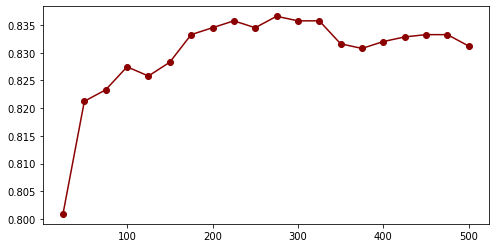

In [ ]:
results=[] #create an empty list, so we can append our accuracy value later
n_estimator_options = [25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,500]
for trees in n_estimator_options:
    model = XGBClassifier(n_estimators = trees, random_state = 101) #create a XGB model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test) #find the model's predict value
    accuracy = np.mean(y_test==y_pred) #Compare the test value and predict value, find the accuracy
    results.append(accuracy) # put the value of accuracy to the empty  list
    
plt.figure(figsize=(8,4))
pd.Series(results, n_estimator_options).plot(color='darkred',marker ='o')

In [ ]:
display(print(confusion_matrix(y_test, y_pred))) # confusion matrix
display(print(classification_report(y_test, y_pred))) #show  precision ,recall,  f1-score,  support

[[1651  148]
 [ 259  353]]


None

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1799
           1       0.70      0.58      0.63       612

    accuracy                           0.83      2411
   macro avg       0.78      0.75      0.76      2411
weighted avg       0.82      0.83      0.83      2411



None

In [ ]:
smo = SMOTE(random_state=42)
X_train, y_train = smo.fit_resample(X_train,y_train)

In [ ]:

print(Counter(y_train))

Counter({0: 4226, 1: 4226})


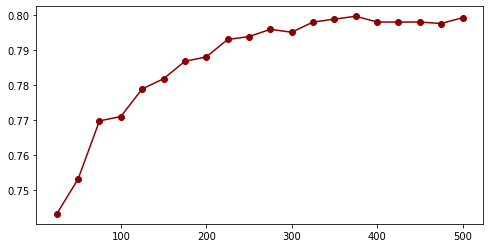

In [ ]:
results=[] #create an empty list, so we can append our accuracy value later
n_estimator_options = [25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,500]
for trees in n_estimator_options:
    model = XGBClassifier(n_estimators = trees, random_state = 101) #create a XGB model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test) #find the model's predict value
    accuracy = np.mean(y_test==y_pred) #Compare the test value and predict value, find the accuracy
    results.append(accuracy) # put the value of accuracy to the empty  list
    
plt.figure(figsize=(8,4))
pd.Series(results, n_estimator_options).plot(color='darkred',marker ='o')

In [ ]:
display(print(confusion_matrix(y_test, y_pred))) # confusion matrix
display(print(classification_report(y_test, y_pred))) #show  precision ,recall,  f1-score,  support

[[1434  365]
 [ 119  493]]


None

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1799
           1       0.57      0.81      0.67       612

    accuracy                           0.80      2411
   macro avg       0.75      0.80      0.76      2411
weighted avg       0.83      0.80      0.81      2411



None

In [ ]:
model = XGBClassifier(n_estimators = 375, random_state = 101)                            #XGB
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred2 = model.predict(X_train)


auc_score1 = roc_auc_score(y_test, y_pred)
display(print('Auc in test set: ',auc_score1))

auc_score2 = roc_auc_score(y_train, y_pred2)
display(print('Auc in train set: ',auc_score2))

Auc in test set:  0.8048448302797125


None

Auc in train set:  0.842640795078088


None

Accuracy is: 0.7992534218166736


None

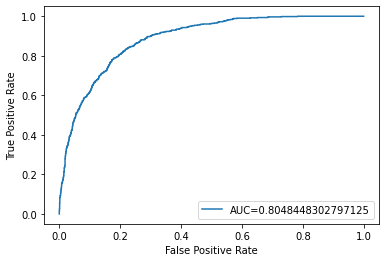

In [ ]:
display(print('Accuracy is:',accuracy))
#display(print(classification_report(y_test, y_pred)))
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred)
#display(print('Auc is:',auc))
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

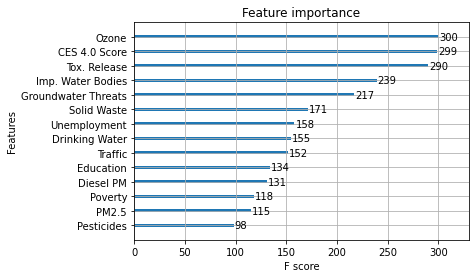

In [ ]:
plot_importance(model)
plt.show()

In [ ]:
feature_col = ['CES 4.0 Score','Ozone','Diesel PM',
                'Drinking Water','Tox. Release',
               'Traffic','Groundwater Threats','Imp. Water Bodies',
               'Solid Waste', 'Education', 'Unemployment']

In [ ]:
X = data[feature_col]
y=data.label
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1) # 70% training and 30% testing

In [ ]:
encoder = OrdinalEncoder(cols = ['CES 4.0 Score','Ozone', 'Diesel PM',
                'Drinking Water','Tox. Release',
               'Traffic','Groundwater Threats','Imp. Water Bodies',
               'Solid Waste', 'Education', 'Unemployment'], 
                         handle_unknown = 'value', 
                         handle_missing = 'value').fit(X_train,y_train) #transform the type of variables from object to float
X_train = encoder.transform(X_train) #transform the tranning data set
X_test = encoder.transform(X_test)# transform the testing data set

In [ ]:
smo = SMOTE(random_state=42)
X_train, y_train = smo.fit_resample(X_train,y_train)

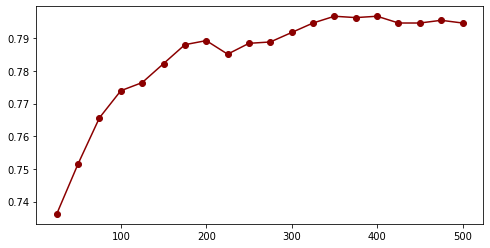

In [ ]:
results=[] #create an empty list, so we can append our accuracy value later
n_estimator_options = [25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,500]
for trees in n_estimator_options:
    model = XGBClassifier(n_estimators = trees, random_state = 101) #create a XGB model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test) #find the model's predict value
    accuracy = np.mean(y_test==y_pred) #Compare the test value and predict value, find the accuracy
    results.append(accuracy) # put the value of accuracy to the empty  list
    
plt.figure(figsize=(8,4))
pd.Series(results, n_estimator_options).plot(color='darkred',marker ='o')

In [ ]:
model = XGBClassifier(n_estimators = 400, random_state = 101)                            #XGB
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred2 = model.predict(X_train)


auc_score1 = roc_auc_score(y_test, y_pred)
display(print('Auc in test set: ',auc_score1))

auc_score2 = roc_auc_score(y_train, y_pred2)
display(print('Auc in train set: ',auc_score2))

Auc in test set:  0.8012821211493677


None

Auc in train set:  0.83719829626124


None

In [ ]:
display(print(confusion_matrix(y_test, y_pred))) # confusion matrix
display(print(classification_report(y_test, y_pred))) #show  precision ,recall,  f1-score,  support
display(print('Auc is: ',auc_score1))
display(print('Accuracy is:',accuracy))

[[1425  374]
 [ 116  496]]


None

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1799
           1       0.57      0.81      0.67       612

    accuracy                           0.80      2411
   macro avg       0.75      0.80      0.76      2411
weighted avg       0.83      0.80      0.81      2411



None

Auc is:  0.8012821211493677


None

Accuracy is: 0.7946909995852344


None